In [3]:
import pandas as pd

In [154]:
import datetime as dt

In [4]:
import random

In [5]:
import numpy as np

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
import matplotlib as mpl

In [196]:
df=pd.read_csv("file:///C:/Users/P4/Desktop/datacat.csv")

In [197]:
df.head()

,ad_id,xyzCampId,fbCampId,interest,impr,Clicks,Spent,conv,appConv,totConv,...,totConVal,CPM,costPerCon,ROAS,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
0,1121091,1178,144531,10,1194718,141,254.049996,28,14,42,...,1540,0.212644,6.048809,6.061799,0,1,1,0,0,0
1,1121092,1178,144531,10,637648,67,122.400000,13,5,18,...,565,0.191955,6.800000,4.616013,0,1,1,0,0,0
2,1121094,1178,144531,10,24362,0,0.000000,1,1,2,...,105,0.000000,0.000000,inf,0,1,1,0,0,0
3,1121095,1178,144531,10,459690,50,86.330001,5,2,7,...,225,0.187800,12.332857,2.606278,0,1,1,0,0,0
4,1121096,1178,144531,10,750060,86,161.909999,11,2,13,...,255,0.215863,12.454615,1.574949,0,1,1,0,0,0


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 22 columns):
ad_id         625 non-null int64
xyzCampId     625 non-null int64
fbCampId      625 non-null int64
interest      625 non-null int64
impr          625 non-null int64
Clicks        625 non-null int64
Spent         625 non-null float64
conv          625 non-null int64
appConv       625 non-null int64
totConv       625 non-null int64
appConVal     625 non-null int64
conVal        625 non-null int64
totConVal     625 non-null int64
CPM           625 non-null float64
costPerCon    625 non-null float64
ROAS          625 non-null float64
gender_F      625 non-null int64
gender_M      625 non-null int64
age_30-34     625 non-null int64
age_35-39     625 non-null int64
age_40-44     625 non-null int64
age_45-49     625 non-null int64
dtypes: float64(4), int64(18)
memory usage: 107.5 KB


In [199]:
df.columns

Index(['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks', 'Spent',
       'conv', 'appConv', 'totConv', 'appConVal', 'conVal', 'totConVal', 'CPM',
       'costPerCon', 'ROAS', 'gender_F', 'gender_M', 'age_30-34', 'age_35-39',
       'age_40-44', 'age_45-49'],
      dtype='object')

In [200]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [201]:
encoded=df[['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks', 'Spent',
       'conv', 'appConv', 'totConv', 'appConVal', 'conVal', 'totConVal', 'CPM',
       'costPerCon', 'ROAS', 'gender_F', 'gender_M', 'age_30-34', 'age_35-39',
       'age_40-44', 'age_45-49']].apply(LabelEncoder().fit_transform)

In [202]:
bigdata =pd.concat([encoded], axis=1)

In [203]:
X=bigdata.loc[:,df.columns!='ROAS']

In [204]:
X.columns.values

array(['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks',
       'Spent', 'conv', 'appConv', 'totConv', 'appConVal', 'conVal',
       'totConVal', 'CPM', 'costPerCon', 'gender_F', 'gender_M',
       'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49'], dtype=object)

In [205]:
print(X.shape)

(625, 21)


In [206]:
Y=bigdata.loc[:,df.columns=='ROAS']

In [207]:
Y.columns.values

array(['ROAS'], dtype=object)

In [208]:
print(Y.shape)

(625, 1)


In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
from sklearn.model_selection import learning_curve


In [210]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [211]:
regressor.score (X_train,Y_train)

0.8263835708025757

In [212]:
bigdata.dtypes

ad_id         int32
xyzCampId     int32
fbCampId      int32
interest      int32
impr          int32
Clicks        int32
Spent         int32
conv          int32
appConv       int32
totConv       int32
appConVal     int32
conVal        int32
totConVal     int32
CPM           int32
costPerCon    int32
ROAS          int32
gender_F      int32
gender_M      int32
age_30-34     int32
age_35-39     int32
age_40-44     int32
age_45-49     int32
dtype: object

In [28]:
corr = pd.DataFrame(bigdata)
datacorr=bigdata.corr()
print(datacorr)

               ad_id  xyzCampId  fbCampId  interest      impr    Clicks  \
ad_id       1.000000        NaN  0.984347  0.503029  0.136800  0.231993   
xyzCampId        NaN        NaN       NaN       NaN       NaN       NaN   
fbCampId    0.984347        NaN  1.000000  0.572105  0.156097  0.234343   
interest    0.503029        NaN  0.572105  1.000000 -0.043661 -0.074284   
impr        0.136800        NaN  0.156097 -0.043661  1.000000  0.897627   
Clicks      0.231993        NaN  0.234343 -0.074284  0.897627  1.000000   
Spent       0.175548        NaN  0.178094 -0.098962  0.975289  0.922368   
conv        0.001746        NaN  0.044918  0.006262  0.629135  0.652577   
appConv    -0.079936        NaN -0.047216 -0.041930  0.497960  0.516957   
totConv    -0.009229        NaN  0.032111 -0.003652  0.634921  0.652395   
appConVal  -0.079936        NaN -0.047216 -0.041930  0.497960  0.516957   
conVal      0.001746        NaN  0.044918  0.006262  0.629135  0.652577   
totConVal  -0.033675     

In [37]:
high_corr_var=np.where(corr_matrix>0.1)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var 

[('ad_id', 'fbCampId'),
 ('ad_id', 'interest'),
 ('ad_id', 'impr'),
 ('ad_id', 'Clicks'),
 ('ad_id', 'Spent'),
 ('ad_id', 'CPM'),
 ('ad_id', 'costPerCon'),
 ('ad_id', 'ROAS'),
 ('ad_id', 'gender_F'),
 ('ad_id', 'gender_M'),
 ('ad_id', 'age_30-34'),
 ('ad_id', 'age_40-44'),
 ('ad_id', 'age_45-49'),
 ('fbCampId', 'interest'),
 ('fbCampId', 'impr'),
 ('fbCampId', 'Clicks'),
 ('fbCampId', 'Spent'),
 ('fbCampId', 'CPM'),
 ('fbCampId', 'costPerCon'),
 ('fbCampId', 'ROAS'),
 ('fbCampId', 'gender_F'),
 ('fbCampId', 'gender_M'),
 ('fbCampId', 'age_30-34'),
 ('fbCampId', 'age_40-44'),
 ('fbCampId', 'age_45-49'),
 ('interest', 'CPM'),
 ('interest', 'costPerCon'),
 ('impr', 'Clicks'),
 ('impr', 'Spent'),
 ('impr', 'conv'),
 ('impr', 'appConv'),
 ('impr', 'totConv'),
 ('impr', 'appConVal'),
 ('impr', 'conVal'),
 ('impr', 'totConVal'),
 ('impr', 'CPM'),
 ('impr', 'costPerCon'),
 ('impr', 'ROAS'),
 ('impr', 'gender_F'),
 ('impr', 'gender_M'),
 ('impr', 'age_45-49'),
 ('Clicks', 'Spent'),
 ('Clicks', 

In [225]:
#par la correltion lineaire nous avons eu à enumerer les variables qui sont correlees a ROAS.
#le costpercon n'est pas concerner par la segmentation mais il est une valeures ajoutee a la dataframe car en etant correle à ROAS 
#LORDQUE corr_matrix>0.5 costpercon et ROAS sont correlees 
#LORDQUE corr_matrix>0.1 gender_F,gender_M,age_30-34,age_45-49 et ROAS sont correlees
#voila pourquoi nous sommes focalisees sur la dataframe de corr_matrix>0.1

In [227]:
data=bigdata[['gender_M','gender_F','age_30-34','age_40-44','costPerCon']].drop_duplicates()
data.head()

,gender_M,gender_F,age_30-34,age_40-44,costPerCon
0,1,0,1,0,113
1,1,0,1,0,133
2,1,0,1,0,0
3,1,0,1,0,268
4,1,0,1,0,273


In [228]:
data.shape

(616, 5)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 624
Data columns (total 5 columns):
gender_M      616 non-null int32
gender_F      616 non-null int32
age_30-34     616 non-null int32
age_40-44     616 non-null int32
costPerCon    616 non-null int32
dtypes: int32(5)
memory usage: 16.8 KB


In [230]:
data.shape

(616, 5)

In [231]:
#SEGMENTATION DES VARIABLES DE data en utilisant Kmean cluster

In [216]:
from sklearn.cluster import KMeans

In [232]:
#identification du nombre de cluster important pour la segmentation

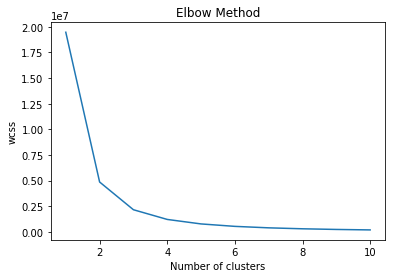

In [217]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [233]:
#la repartition des segments dans chaque cluster

In [235]:
cluster = KMeans(n_clusters=4)
data['cluster'] = cluster.fit_predict(data)
data['cluster'].value_counts()

0    156
3    154
2    153
1    153
Name: cluster, dtype: int64

In [264]:
#nous trouvons que la meilleure repartition ici est le 0 cluster cependant nous allons verifier 
#la clustering ou segmentation graphique par liner dimentionality reduction
#VERIFIONS

In [236]:
from sklearn.decomposition import PCA

In [237]:
pca = PCA(n_components=2)
data['data'] = pca.fit_transform(data)[:,0]
data['ROAS'] = pca.fit_transform(data)[:,1]
data = data.reset_index(drop=True)

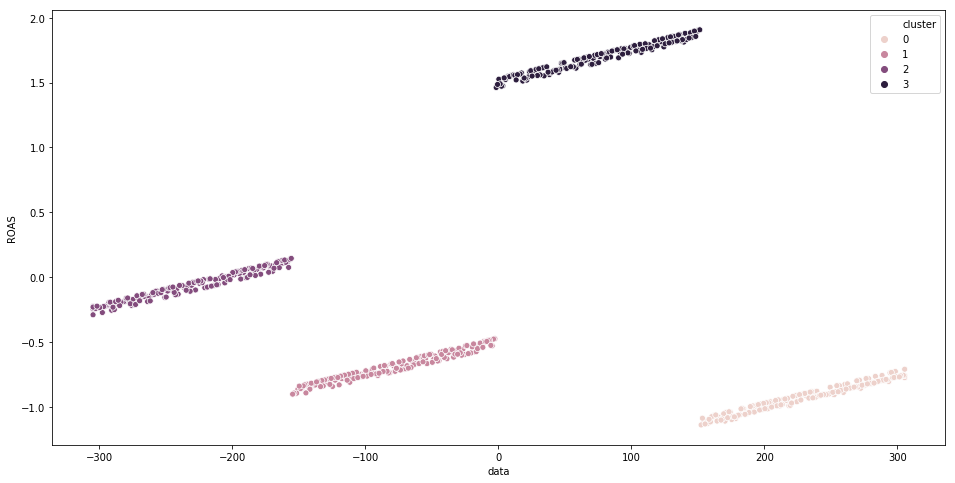

In [238]:
plt.figure(figsize=(16,8))
g = sns.scatterplot('data', 'ROAS', hue='cluster', data=data)
#g.set(ylim=(-500,2000))
#g.set(xlim=(0,6000))

In [266]:
#nous constatons que le cluster3 est le meilleur segment d'identification de notre cible 
#POURTANT AVEC LA REPARTITION ON AVAIT 0 COMME MEILLEUR CLUSTER POUR LE CIBLAGE
#ENCORE VERIFIONS AVEC LES MOYENNES PAR GROUPBY

In [239]:
cluster_0 = data.loc[data['cluster']==0]
cluster_1 = data.loc[data['cluster']==1]
cluster_2 = data.loc[data['cluster']==2]
cluster_3 = data.loc[data['cluster']==3]

In [240]:
data = data.groupby('cluster').mean()

In [241]:
data

,gender_M,gender_F,age_30-34,age_40-44,costPerCon,data,ROAS
cluster,,,,,,,
0,0.416667,0.583333,0.128205,0.307692,534.480769,229.979077,-0.925987
1,0.575163,0.424837,0.359477,0.156863,226.000000,-78.503415,-0.689569
2,0.712418,0.287582,0.575163,0.137255,73.039216,-231.466450,-0.068447
3,0.532468,0.467532,0.201299,0.227273,379.500000,74.991255,1.691106


In [267]:
#NOUS CONSTATONS QUE LA VALEUR MOYENNE DE ROAS EST MAXIMAL DONC CLUSTER VERIFIER D'OU NOTRE SEGMENT EST CLUSTER 3
#ROAS qui etant comme un chiffre d'affaire de chaque entreprise qui investit chez facebook pour son marketing, cependant nous avonS la moyenne de ROAS=1,69 d'ou un chiffre d'affaire croissant dans le cluster 3, donc la variable qui permet ici d'augmenter ROAS  est gender_M avec une moyenne superieure a touteS autres variables d'ou gender= 0.53 dans le cluster 3
#notre cible ici est alors gender_M

In [256]:
#nous allons encore verifier par groupby la moyenne la plus eleve ou importante qui permettra d'identifier notre cible
#VERIFICATION

In [151]:
cluster_agg = data.groupby('cluster').agg({'gender_M':['min', 'mean','max'],
                                                'gender_F':['min', 'mean', 'max'],
                                                'age_30-34':['min', 'mean', 'max'],
                                                  'age_40-44':['min', 'mean', 'max']})

In [152]:
cluster_agg

gender_M                      gender_F                     age_30-34  \
              min      mean       max       min      mean       max       min   
cluster                                                                         
0        0.575163  0.575163  0.575163  0.424837  0.424837  0.424837  0.359477   
1        0.416667  0.416667  0.416667  0.583333  0.583333  0.583333  0.128205   
2        0.532468  0.532468  0.532468  0.467532  0.467532  0.467532  0.201299   
3        0.712418  0.712418  0.712418  0.287582  0.287582  0.287582  0.575163   

                            age_40-44                      
             mean       max       min      mean       max  
cluster                                                    
0        0.359477  0.359477  0.156863  0.156863  0.156863  
1        0.128205  0.128205  0.307692  0.307692  0.307692  
2        0.201299  0.201299  0.227273  0.227273  0.227273  
3        0.575163  0.575163  0.137255  0.137255  0.137255

In [268]:
#NOUS AVONS REMARQUE QUE LA MOYENNE EST ENCORE PLUS ELEVEE DANS LE CLUSTER 3 AVEC UN CIBLE gender_M
#DONC VERIFIEE
#CEPENDANT SI ON DOIT INTERPRETER POUR L'AGE  CEPENDANT l'age_30-34 PERMET DE CROITRE ROAS vis a vis des autres ages
#car moyenne de age_30-34 est 0.575163 superieur a celui de age_40-44

In [269]:
#CONCLUSION : NOTRE CIBLE EST DONC gender_M ET age_30-34

In [258]:
#METHODES rfm(RECENCY FREQUENCE MONETARY )

In [246]:
rfm_table = data.groupby('data').agg({ 'data':lambda x: x.nunique(),
                                        'ROAS': 'sum'})

In [247]:
rfm_table

,data,ROAS
data,,
-231.466450,1.0,-0.068447
-78.503415,1.0,-0.689569
74.991255,1.0,1.691106
229.979077,1.0,-0.925987


In [249]:
rfm_table.rename(columns ={ 'data':'recency',
                            'ROAS' : 'frequency'}, inplace=True)
rfm_table.head()

,recency,frequency
data,,
-231.466450,1.0,-0.068447
-78.503415,1.0,-0.689569
74.991255,1.0,1.691106
229.979077,1.0,-0.925987


In [250]:
cols = ['recency', 'frequency']
rfm_table = rfm_table[cols]

In [251]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [261]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [254]:
segmented_rfm = rfm_table= rfm_table
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm.head()

,recency,frequency,r_quartile,f_quartile
data,,,,
-231.466450,1.0,-0.068447,1,2
-78.503415,1.0,-0.689569,1,3
74.991255,1.0,1.691106,1,1
229.979077,1.0,-0.925987,1,4
